### 📝 Project Summary: Diabetes Prediction Using SVM

- **Objective:**  
  Predict whether a person has diabetes using machine learning with Support Vector Machine (SVM).

- **Dataset Details:**  
  - Source: [Pima Indians Diabetes Dataset](https://www.dropbox.com/scl/fi/0uiujtei423te1q4kvrny/diabetes.csv)  
  - Features: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree, Age  
  - Target: Outcome (0 = No Diabetes, 1 = Diabetes)

- **Approach:**  
  - Scaled features using `StandardScaler`  
  - Trained SVM with different kernels  
  - Tuned hyperparameters using `GridSearchCV`

- **Results:**  
  - Best Accuracy: ~76%  
  - Confusion Matrix and ROC curve indicate decent classification

- **Learning & Improvements:**  
  - Learned SVM concepts and hyperparameter tuning  
  - Could improve further with more data and advanced preprocessing


In [3]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd
# Load the dataset from CSV file
data = pd.read_csv('diabetes.csv')
# Display first 5 rows of the dataset to understand the data structure
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Get a summary of the dataset including data types and non-null counts
data.info()
# Check for any missing values in the dataset
print("\nMissing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age         

In [7]:
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1) # All columns except 'Outcome' are features
y = data['Outcome'] # 'Outcome' is the target variable (0 or 1)



In [8]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler to normalize feature data (mean=0, std=1)
scaler = StandardScaler()
# Fit scaler on features and transform them to scaled features
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
# 80% training data, 20% testing data, fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.svm import SVC
# Create an SVM model with a linear kernel
model = SVC(kernel='linear')
# Train the SVM model on training data
model.fit(X_train, y_train)


SVC(kernel='linear')

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predict outcomes on the test set
y_pred = model.predict(X_test)
# Print accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
# Print confusion matrix to see True Positives, True Negatives, False Positives, and False Negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Print detailed classification report including precision, recall, and f1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7597402597402597
Confusion Matrix:
 [[81 18]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [12]:
# Now, try tuning the SVM model with different kernels and parameters using GridSearchCV
model = SVC(kernel='rbf')


In [13]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'poly', 'linear'] # Different kernel types
}
# Initialize GridSearchCV to find best parameters using 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
# Fit GridSearch to training data
grid.fit(X_train, y_train)
# Print the best hyperparameters found by GridSearch
print("Best Parameters:", grid.best_params_)
# Predict on test set using the tuned model
y_pred = grid.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Print tuned model's accuracy
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
# Print confusion matrix for tuned model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Print classification report for tuned model
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, 

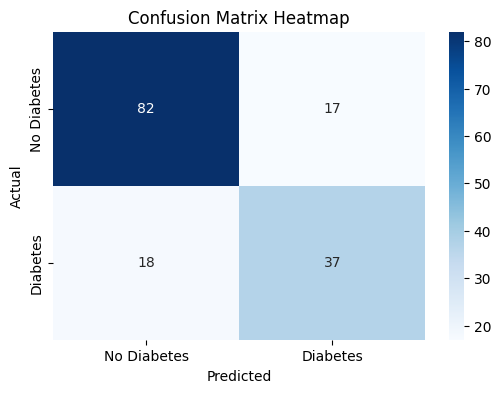

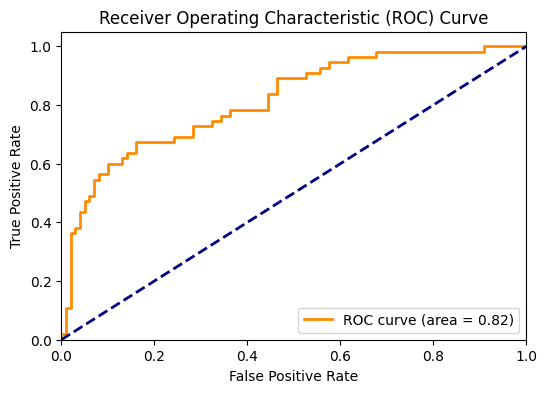

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
# Plot confusion matrix heatmap for better visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
# Calculate ROC curve and AUC (Area Under Curve) to evaluate model's performance
y_scores = grid.decision_function(X_test)  # Scores for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')   # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
